### Look at input data

In [131]:
# import packages

import numpy as np
import xarray as xr
import pandas as pd

# plotting
try:
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
except:
    print('not installed')

In [132]:
# load csv data

# observation
df_obs = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/fire_precip_temp.csv')

# CMIP6 prediction
df_ssp126gfdl = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp126gfdl_firecounts_predicted.csv')
df_ssp370gfdl = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp370gfdl_firecounts_predicted.csv')
df_ssp585gfdl = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp585gfdl_firecounts_predicted.csv')

df_ssp126mri = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp126mri_firecounts_predicted.csv')
df_ssp370mri = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp370mri_firecounts_predicted.csv')
df_ssp585mri = pd.read_csv('/home/steidani/hackathon/2021_ai_climate/data/cmip6_ssp585mri_firecounts_predicted.csv')

In [133]:
### plot temporal evolution of global fire counts

# group by (sum of burned cells) year and month
#test = df_obs.groupby(['year','month']).sum().reset_index().sort_values(['year', 'month'])
df_obs = df_obs.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp126gfdl = df_ssp126gfdl.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp370gfdl = df_ssp370gfdl.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp585gfdl = df_ssp585gfdl.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp126mri = df_ssp126mri.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp370mri = df_ssp370mri.groupby(['year']).sum().reset_index().sort_values(['year'])
df_ssp585mri = df_ssp585mri.groupby(['year']).sum().reset_index().sort_values(['year'])

In [134]:
# mean and std between two models
df_ssp585 = (df_ssp585gfdl['BurnedCells']+ df_ssp585mri['BurnedCells'])/2
df_ssp370 = (df_ssp370gfdl['BurnedCells']+ df_ssp370mri['BurnedCells'])/2

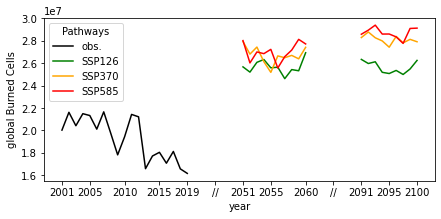

In [138]:
f, ax = plt.subplots(1,1, figsize=(7,3))

# obs
plt.plot(np.arange(0,19,1), df_obs.BurnedCells[1:-1], color='black', label='obs.')
# gfdl
plt.plot(np.arange(26,36,1), df_ssp126gfdl.BurnedCells[0:10], color = 'green', label='SSP126')
plt.plot(np.arange(26,36,1), df_ssp370[0:10], color = 'orange', label='SSP370')
plt.plot(np.arange(26,36,1), df_ssp585[0:10], color = 'red', label='SSP585')
plt.plot(np.arange(43,52,1), df_ssp126gfdl.BurnedCells[10:-1], color = 'green')
plt.plot(np.arange(43,52,1), df_ssp370[10:-1], color = 'orange')
plt.plot(np.arange(43,52,1), df_ssp585[10:-1], color = 'red')

#mri
#plt.plot(np.arange(26,36,1), df_ssp126mri.BurnedCells[0:10], color = 'green', linestyle='--')
#plt.plot(np.arange(26,36,1), df_ssp370mri.BurnedCells[0:10], color = 'orange', linestyle='--')
#plt.plot(np.arange(26,36,1), df_ssp585mri.BurnedCells[0:10], color = 'red', linestyle='--')
#plt.plot(np.arange(43,52,1), df_ssp126mri.BurnedCells[10:-1], color = 'green', linestyle='--')
#plt.plot(np.arange(43,52,1), df_ssp370mri.BurnedCells[10:-1], color = 'orange', linestyle='--')
#plt.plot(np.arange(43,52,1), df_ssp585mri.BurnedCells[10:-1], color = 'red', linestyle='--')

# make nice
plt.xticks([0,4,9,14,18, 22, 26, 30, 35, 39, 43, 47, 51 ],['2001', '2005', '2010', '2015', '2019', '//', '2051', '2055', '2060', '//', '2091', '2095', '2100'])
plt.ylabel('global Burned Cells')
plt.xlabel('year')
legend1 = plt.legend(loc="upper left", title="Pathways")

# add second legend
#from matplotlib.lines import Line2D
#linestyles = ['-', '--']
#lines = [Line2D([0], [0], color='gray', linewidth=3, linestyle=c) for c in linestyles]
#labels = ['GFDL-ESM4', 'MRI-ESM2']
#legend2 = plt.legend(lines, labels, loc="lower right", title="CMIP6 Models")
#plt.gca().add_artist(legend1)

plt.savefig('fire_count_prediction_lineplot_gfdl_mri.png',bbox_inches='tight')